<a href="https://colab.research.google.com/github/leoquiroa/Prophet/blob/master/RevenuePerDoctor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# essentials
import numpy as np 
import pandas as pd 

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# time series algorithm
from fbprophet import Prophet
from fbprophet.diagnostics import performance_metrics

# reproducibility
np.random.seed(34)

# Jupyter magic
%reload_ext autoreload
%autoreload 2
%matplotlib inline

sns.set()

In [2]:
url = 'https://raw.githubusercontent.com/leoquiroa/Prophet/master/data/daily_revenue_doctor.csv'
df_doc = pd.read_csv(
    url, 
    nrows=4167,
    names = ['ds','cat','y'], 
    parse_dates = True )
df_doc.head()

,ds,cat,y
0,2016-02-15,Manjunath Vadmal,1439.90
1,2016-02-15,Robert Caputo,5472.11
2,2016-02-15,Susan Jones,0.00
3,2016-02-16,Manjunath Vadmal,3859.97
4,2016-02-16,Robert Caputo,3248.52


In [3]:
df_doc.tail()

,ds,cat,y
4162,2019-12-03,Robert Caputo,8249.79
4163,2019-12-03,Susan Jones,2074.93
4164,2019-12-04,Manjunath Vadmal,5767.96
4165,2019-12-04,Robert Caputo,0.00
4166,2019-12-04,Susan Jones,0.00


In [4]:
df_doc.shape

(4167, 3)

In [5]:
df_doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167 entries, 0 to 4166
Data columns (total 3 columns):
ds     4167 non-null object
cat    4167 non-null object
y      4167 non-null float64
dtypes: float64(1), object(2)
memory usage: 97.8+ KB


In [0]:
df_doc['ds']=pd.to_datetime(df_doc['ds'])

In [7]:
df_doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167 entries, 0 to 4166
Data columns (total 3 columns):
ds     4167 non-null datetime64[ns]
cat    4167 non-null object
y      4167 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 97.8+ KB


Filter by

In [8]:
name_doc = 'Robert Caputo'
df_filter = df_doc[df_doc['cat'] == name_doc][['ds','y']]
df_filter.shape

(1389, 2)

In [9]:
df_filter.head()

,ds,y
1,2016-02-15,5472.11
4,2016-02-16,3248.52
7,2016-02-17,4977.18
10,2016-02-18,5482.26
13,2016-02-19,5495.88


In [10]:
df_filter.tail()

,ds,y
4153,2019-11-30,0.00
4156,2019-12-01,0.00
4159,2019-12-02,7375.55
4162,2019-12-03,8249.79
4165,2019-12-04,0.00


Split

In [11]:
div = 0.98
split_point = int(df_filter.shape[0] * div)
train = df_filter[:split_point]
test = df_filter[split_point:]
print(train.shape)
print(test.shape)

(1361, 2)
(28, 2)


In [12]:
train.tail()

,ds,y
4069,2019-11-02,2878.59
4072,2019-11-03,0.00
4075,2019-11-04,3153.26
4078,2019-11-05,3344.61
4081,2019-11-06,5002.10


In [13]:
test.head()

,ds,y
4084,2019-11-07,2661.83
4087,2019-11-08,2913.06
4090,2019-11-09,5610.42
4093,2019-11-10,0.00
4096,2019-11-11,6949.18


In [14]:
m = Prophet()
m.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
future = m.make_future_dataframe(periods=28, freq='d')
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2016-02-15,5078.114862,3498.807587,6756.556787
1,2016-02-16,4851.658507,3199.792180,6499.221200
2,2016-02-17,5165.598418,3495.734127,6804.152479
3,2016-02-18,4811.310113,3247.137911,6491.747675
4,2016-02-19,4982.474956,3263.086555,6492.241744
...,...,...,...,...
1384,2019-11-30,2123.637565,486.051512,3807.915736
1385,2019-12-01,303.902602,-1322.561924,1920.342538
1386,2019-12-02,5245.309005,3629.332413,7023.419606
1387,2019-12-03,5044.407875,3520.264963,6630.799048


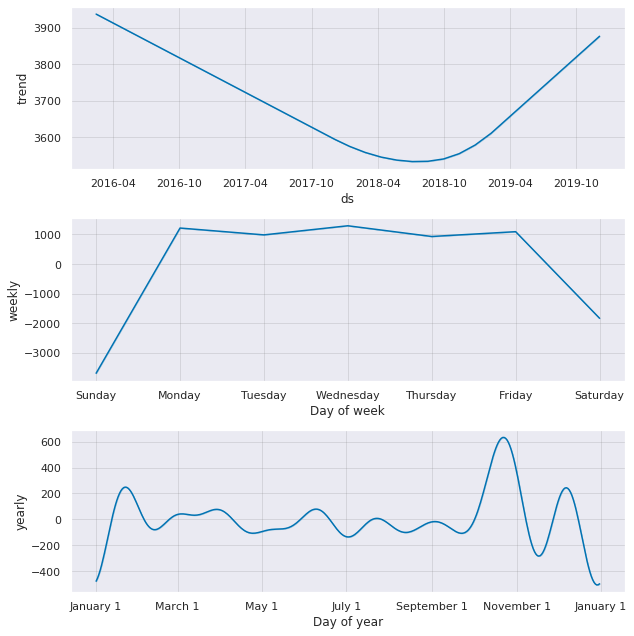

In [16]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].shapefig_decompose = m.plot_components(forecast)

In [20]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-02-15,3936.962352,3498.807587,6756.556787,3936.962352,3936.962352,1141.152510,1141.152510,1141.152510,1217.042551,1217.042551,1217.042551,-75.890041,-75.890041,-75.890041,0.0,0.0,0.0,5078.114862
1,2016-02-16,3936.440787,3199.792180,6499.221200,3936.440787,3936.440787,915.217721,915.217721,915.217721,985.884817,985.884817,985.884817,-70.667096,-70.667096,-70.667096,0.0,0.0,0.0,4851.658507
2,2016-02-17,3935.919221,3495.734127,6804.152479,3935.919221,3935.919221,1229.679197,1229.679197,1229.679197,1293.463709,1293.463709,1293.463709,-63.784512,-63.784512,-63.784512,0.0,0.0,0.0,5165.598418
3,2016-02-18,3935.397655,3247.137911,6491.747675,3935.397655,3935.397655,875.912458,875.912458,875.912458,931.483266,931.483266,931.483266,-55.570808,-55.570808,-55.570808,0.0,0.0,0.0,4811.310113
4,2016-02-19,3934.876090,3263.086555,6492.241744,3934.876090,3934.876090,1047.598866,1047.598866,1047.598866,1093.965029,1093.965029,1093.965029,-46.366163,-46.366163,-46.366163,0.0,0.0,0.0,4982.474956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,2019-11-30,3872.712916,486.051512,3807.915736,3872.381094,3872.914154,-1749.075351,-1749.075351,-1749.075351,-1832.041585,-1832.041585,-1832.041585,82.966234,82.966234,82.966234,0.0,0.0,0.0,2123.637565
1385,2019-12-01,3873.601049,-1322.561924,1920.342538,3873.224512,3873.865716,-3569.698448,-3569.698448,-3569.698448,-3689.797787,-3689.797787,-3689.797787,120.099340,120.099340,120.099340,0.0,0.0,0.0,303.902602
1386,2019-12-02,3874.489182,3629.332413,7023.419606,3874.056152,3874.803539,1370.819823,1370.819823,1370.819823,1217.042551,1217.042551,1217.042551,153.777271,153.777271,153.777271,0.0,0.0,0.0,5245.309005
1387,2019-12-03,3875.377315,3520.264963,6630.799048,3874.906367,3875.735108,1169.030560,1169.030560,1169.030560,985.884817,985.884817,985.884817,183.145743,183.145743,183.145743,0.0,0.0,0.0,5044.407875


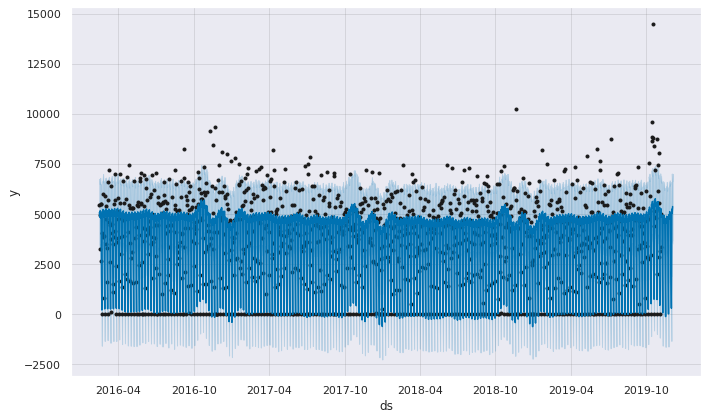

In [18]:
fig = m.plot(forecast)

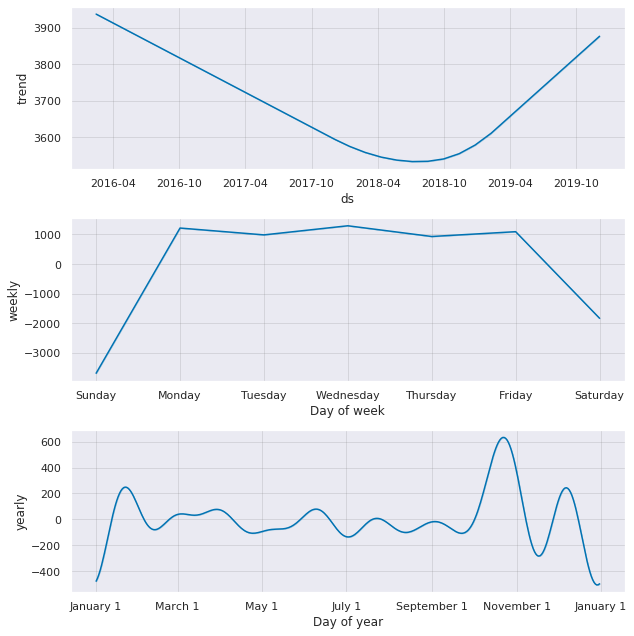

In [19]:
fig_decompose = m.plot_components(forecast)

In [21]:
forecast[(forecast['ds'] >= '2019-11-26') & (forecast['ds'] <= '2019-11-30')]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1380,2019-11-26,3869.160385,2943.049672,6400.879760,3868.963201,3869.269591,904.995336,904.995336,904.995336,985.884817,985.884817,985.884817,-80.889480,-80.889480,-80.889480,0.0,0.0,0.0,4774.155721
1381,2019-11-27,3870.048518,3483.515138,6680.571255,3869.817124,3870.174897,1253.823791,1253.823791,1253.823791,1293.463709,1293.463709,1293.463709,-39.639919,-39.639919,-39.639919,0.0,0.0,0.0,5123.872308
1382,2019-11-28,3870.936650,3229.278224,6485.739212,3870.680778,3871.077369,933.582766,933.582766,933.582766,931.483266,931.483266,931.483266,2.099500,2.099500,2.099500,0.0,0.0,0.0,4804.519417
1383,2019-11-29,3871.824783,3334.924164,6597.848943,3871.515676,3871.988194,1137.270920,1137.270920,1137.270920,1093.965029,1093.965029,1093.965029,43.305891,43.305891,43.305891,0.0,0.0,0.0,5009.095703
1384,2019-11-30,3872.712916,486.051512,3807.915736,3872.381094,3872.914154,-1749.075351,-1749.075351,-1749.075351,-1832.041585,-1832.041585,-1832.041585,82.966234,82.966234,82.966234,0.0,0.0,0.0,2123.637565


In [22]:
test[(test['ds'] >= '2019-11-26') & (test['ds'] <= '2019-11-30')]

,ds,y
4141,2019-11-26,7871.19
4144,2019-11-27,6131.85
4147,2019-11-28,0.00
4150,2019-11-29,0.00
4153,2019-11-30,0.00


In [41]:
yhat = forecast[(forecast['ds'] >= '2019-07-02') & (forecast['ds'] <= '2019-07-06')][['ds','yhat']][['ds','yhat']]
yreal = train[(train['ds'] >= '2019-07-02') & (train['ds'] <= '2019-07-06')]
merged_inner = pd.merge(left=yreal,right=yhat, left_on='ds', right_on='ds')
merged_inner

,ds,y,yhat
0,2019-07-02,4166.43,4588.856461
1,2019-07-03,4183.69,4896.683554
2,2019-07-04,0.00,4536.817629
3,2019-07-05,3338.40,4703.207599
4,2019-07-06,1874.83,1782.791439


In [43]:
yhat = forecast[(forecast['ds'] >= '2019-11-26') & (forecast['ds'] <= '2019-11-30')][['ds','yhat']][['ds','yhat']]
yreal = test[(test['ds'] >= '2019-11-26') & (test['ds'] <= '2019-11-30')]
merged_inner = pd.merge(left=yreal,right=yhat, left_on='ds', right_on='ds')
merged_inner

,ds,y,yhat
0,2019-11-26,7871.19,4774.155721
1,2019-11-27,6131.85,5123.872308
2,2019-11-28,0.00,4804.519417
3,2019-11-29,0.00,5009.095703
4,2019-11-30,0.00,2123.637565
